B21CS001 :- A V Prithvi Kiran Naik
B21CS005 :- Akshat Jain
B21CS010 :- Ankana Chowdhury

Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Mouting the google drive in google collab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Online_retail_utf.csv")

In [ ]:
df_ = data

Changing the column names to lowercase and making a deepcopy of this dataset

In [ ]:
df_.columns = [col.lower() for col in df_.columns]
df = deepcopy(df_)
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Preprocessing the dataset:

dropping rows with missing values

In [ ]:
df.dropna(inplace=True)

counting unique items

In [ ]:
df['description'].nunique()

3896

total number of each unique item

In [ ]:
df['description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: description, Length: 3896, dtype: int64

Grouping description based on sum of its quantity and retrieving top 5 products with the highest total quantity.

In [ ]:
df.groupby('description').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head()

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


Adding a new column total price in the dataframe and
Sorting dataframe in descending order based on values in the total price column

In [ ]:
df['total_price'] = df['quantity'] * df['unitprice']
df.sort_values(by='total_price', ascending=False)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom,168469.60
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom,77183.60
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,10-06-2011 15:28,649.50,15098.0,United Kingdom,38970.00
173382,551697,POST,POSTAGE,1,03-05-2011 13:46,8142.75,16029.0,United Kingdom,8142.75
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,20-09-2011 11:05,5.06,17450.0,United Kingdom,7144.72
...,...,...,...,...,...,...,...,...,...
173277,C551685,POST,POSTAGE,-1,03-05-2011 12:51,8142.75,16029.0,United Kingdom,-8142.75
422375,C573079,M,Manual,-2,27-10-2011 14:15,4161.06,12536.0,France,-8322.12
222681,C556445,M,Manual,-1,10-06-2011 15:31,38970.00,15098.0,United Kingdom,-38970.00
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346.0,United Kingdom,-77183.60


Removing rows that represent cancellation or returns of previous transaction

In [ ]:
df = df[~df['invoiceno'].str.contains('C', na=False)]

Count of unique countries and total count of each country in the dataset

In [ ]:
print(df['country'].nunique())
print(df['country'].value_counts())

37
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithu

Grouping customers based on each country they belong to

In [ ]:
df3 = df.groupby('customerid')['country'].value_counts().reset_index(name='count')
df3

,customerid,country,count
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17
...,...,...,...
4342,18280.0,United Kingdom,10
4343,18281.0,United Kingdom,7
4344,18282.0,United Kingdom,12
4345,18283.0,United Kingdom,756


In [ ]:
print(df3['country'].nunique())
print(df3['country'].value_counts())

37
United Kingdom          3921
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Channel Islands            9
Denmark                    9
Australia                  9
Sweden                     8
Japan                      8
Cyprus                     8
Poland                     6
USA                        4
Canada                     4
Greece                     4
Unspecified                4
Israel                     3
EIRE                       3
United Arab Emirates       2
Bahrain                    2
Malta                      2
Saudi Arabia               1
Singapore                  1
Iceland                    1
RSA                        1
Lebanon                    1
Brazil                     1
Czech Repub

Number of unique invoice numbers

In [ ]:
print(df['invoiceno'].nunique())

18536


Number of times unique customers reappeared



In [ ]:
df['customerid'].value_counts()

17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4596
14606.0    2700
           ... 
15313.0       1
17846.0       1
13185.0       1
16953.0       1
16737.0       1
Name: customerid, Length: 4339, dtype: int64

grouping customers based on their total invoice numbers

In [ ]:
df4 = df.groupby('customerid')['invoiceno'].value_counts().reset_index(name='count')
df4

,customerid,invoiceno,count
0,12346.0,541431,1
1,12347.0,573511,47
2,12347.0,537626,31
3,12347.0,542237,29
4,12347.0,549222,24
...,...,...,...
18531,18283.0,560032,1
18532,18283.0,575675,1
18533,18287.0,570715,38
18534,18287.0,554065,29


Total number of reappearance of each customer

In [ ]:
print(df4['customerid'].value_counts())

12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
          ... 
14355.0      1
13403.0      1
15488.0      1
14353.0      1
12346.0      1
Name: customerid, Length: 4339, dtype: int64


Importing all the neccesary libraries

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
import datetime as dt
from datetime import datetime
from sklearn.decomposition import PCA

Total monetary value of purchases of each customer

In [ ]:
x1 = df.groupby('customerid').agg({'total_price': 'sum'})

Total items bought by the customers

In [ ]:
x2 = df.groupby('customerid').agg({'quantity': 'sum'})

Number of times the buyer visited

In [ ]:
x3 = df.groupby('customerid').agg({'invoiceno': 'nunique'})

Sorting x3 by invoice number in descending order

In [ ]:
x3.sort_values(by = 'invoiceno',ascending = False)

,invoiceno
customerid,
12748.0,210
14911.0,201
17841.0,124
13089.0,97
14606.0,93
...,...
14355.0,1
13403.0,1
15488.0,1


Converting the date string values in the 5th column of df into datetime objects

In [ ]:
for i in range(len(df)):
  df.iloc[i,4] = datetime.strptime(df.iloc[i,4], '%d-%m-%Y %H:%M')

Maximum of the invoicedate column of dataframe df

In [ ]:
df['invoicedate'].max()

datetime.datetime(2011, 12, 9, 12, 50)

Cheking the type

In [ ]:
type(df['invoicedate'].max())

datetime.datetime

assigning the reference date

In [ ]:
reference_date = dt.datetime(2011,12,16)
reference_date

datetime.datetime(2011, 12, 16, 0, 0)

assigning x4 as recency of the purchases by the customer

In [ ]:
x4 = df.groupby('customerid').agg({'invoicedate': lambda x: (reference_date - x.max()).days})

Creating a dataframe d2 using x1,x2,x3 and x4 as columns

In [ ]:
df2 = pd.DataFrame()
df2['x1'] = x1
df2['x2'] = x2
df2['x3'] = x3
df2['x4'] = x4

printing df2

In [ ]:
df2

,x1,x2,x3,x4
customerid,,,,
12346.0,77183.60,74215,1,331
12347.0,4310.00,2458,7,8
12348.0,1797.24,2341,4,81
12349.0,1757.55,631,1,24
12350.0,334.40,197,1,316
...,...,...,...,...
18280.0,180.60,45,1,283
18281.0,80.82,54,1,186
18282.0,178.05,103,2,13


Removing rows with negative values from the respective columns

In [ ]:
rows_dropped = []
col_n = list(df2.columns)

for index,row in df2.iterrows():
  for col in col_n:
    if row[col] <= 0:
      rows_dropped.append(index)

print(rows_dropped)
df2 = df2.drop(list(set(rows_dropped)), axis=0, inplace=False)

[13256.0]


Creating scatterplot and visualizing total bill against total number of products

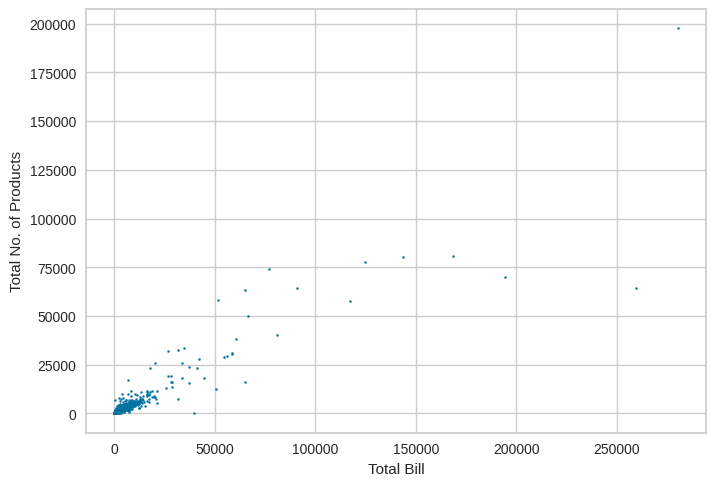

In [ ]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,1],s =2)
plt.xlabel('Total Bill')
plt.ylabel('Total No. of Products')
plt.show()

Plotting total bill against frequency of buying

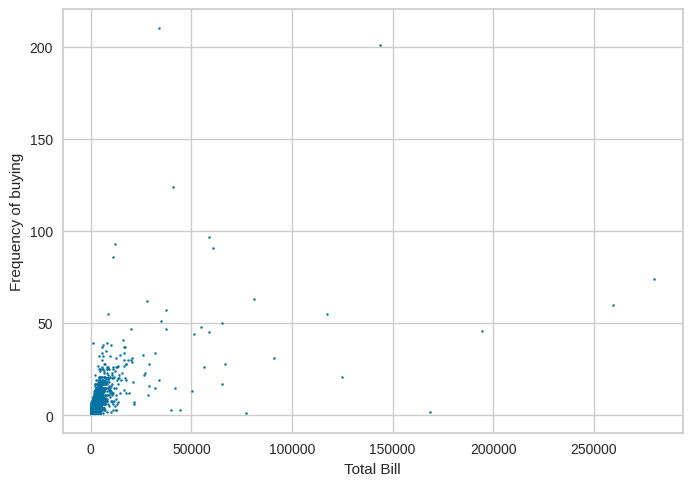

In [ ]:
plt.scatter(df2.iloc[:,0],df2.iloc[:,2],s =2)
plt.xlabel('Total Bill')
plt.ylabel('Frequency of buying')
plt.show()

creating a new dataframe y5

In [ ]:
y1 = df.groupby('customerid').agg({'total_price': 'sum'}).reset_index()
y2 = df.groupby('customerid').agg({'quantity': 'sum'}).reset_index()
y3 = df.groupby('customerid').agg({'invoiceno': 'nunique'}).reset_index()
y4 = df.groupby('customerid').agg({'invoicedate': lambda x: (reference_date - x.max()).days}).reset_index()
y5 = pd.DataFrame()
y5['customerid'] = y1['customerid']
y5['total_spending'] = y1['total_price']
y5['total_items'] = y2['quantity']
y5['frequency'] = y3['invoiceno']
y5['recency'] = y4['invoicedate']
print(y5)

      customerid  total_spending  total_items  frequency  recency
0        12346.0        77183.60        74215          1      331
1        12347.0         4310.00         2458          7        8
2        12348.0         1797.24         2341          4       81
3        12349.0         1757.55          631          1       24
4        12350.0          334.40          197          1      316
...          ...             ...          ...        ...      ...
4334     18280.0          180.60           45          1      283
4335     18281.0           80.82           54          1      186
4336     18282.0          178.05          103          2       13
4337     18283.0         2094.88         1397         16        9
4338     18287.0         1837.28         1586          3       48

[4339 rows x 5 columns]


Applying kmeans to the dataframe df2 and
finding the best value of k(optimum cluster number) using the elbow method

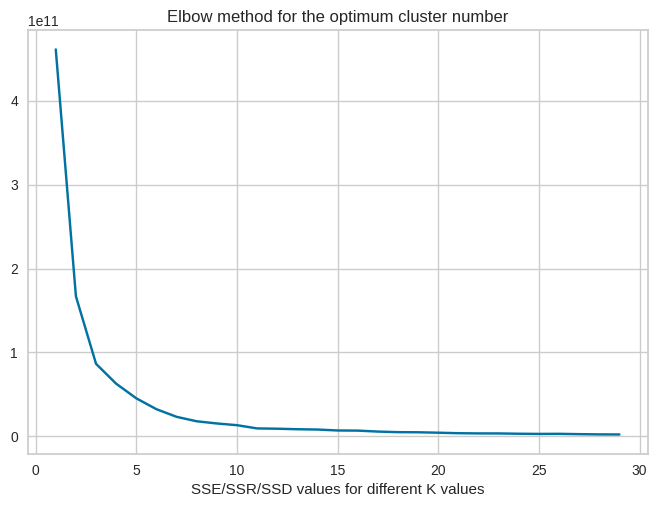

In [ ]:
kmeans = KMeans()
ssd = []
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k,n_init='auto').fit(df2)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, 'bx-')
plt.xlabel('SSE/SSR/SSD values for different K values')
plt.title('Elbow method for the optimum cluster number')
plt.show(block=True)

Again visualizing using the elbow method

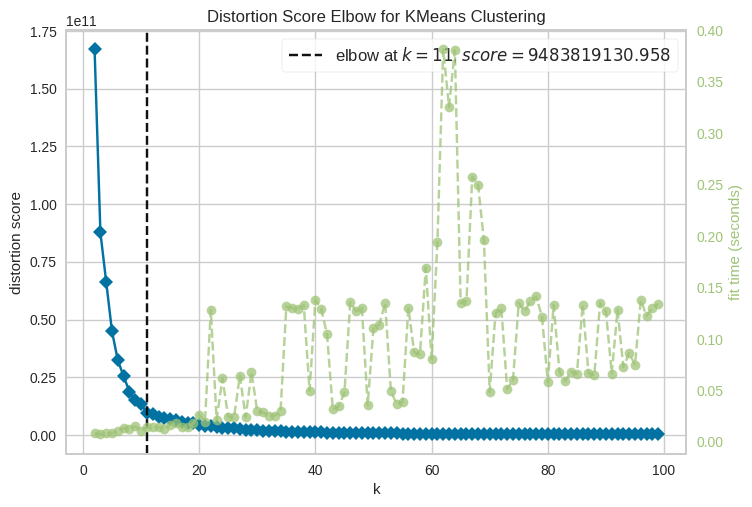

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,100))

visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show()

Plotting the results(clusters) using a scatterplot for total bill vs total no. of products.

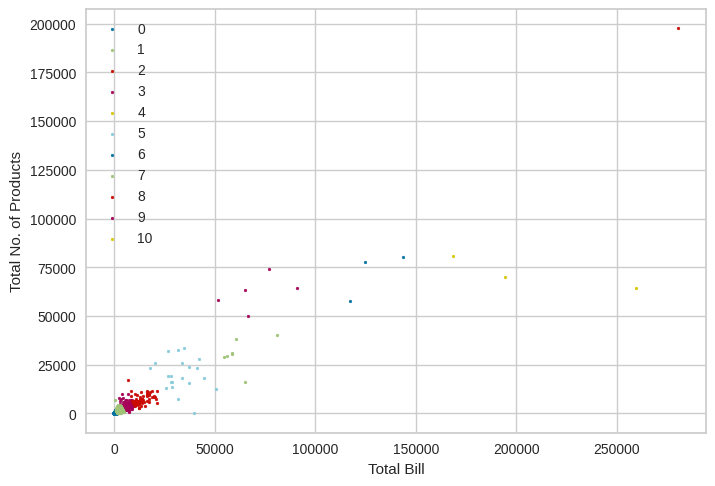

In [ ]:
model = KMeans(n_clusters=11, random_state=0,n_init='auto')
labels = model.fit_predict(df2)
u_labels = np.unique(labels)

#plotting the results:

for i in u_labels:
    plt.scatter(df2[labels == i].iloc[:,0] , df2[labels == i].iloc[:,1], label = i,s = 4)
plt.xlabel('Total Bill')
plt.ylabel('Total No. of Products')
plt.legend()
plt.show()

Finding cluster centers

In [ ]:
centers=model.cluster_centers_
new_centers = centers[:,:2]

Plotting Voronoi plots

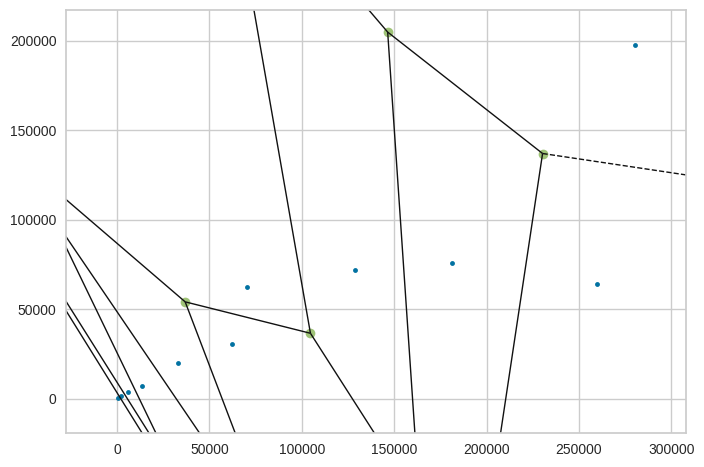

In [ ]:
vor = Voronoi(new_centers)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()

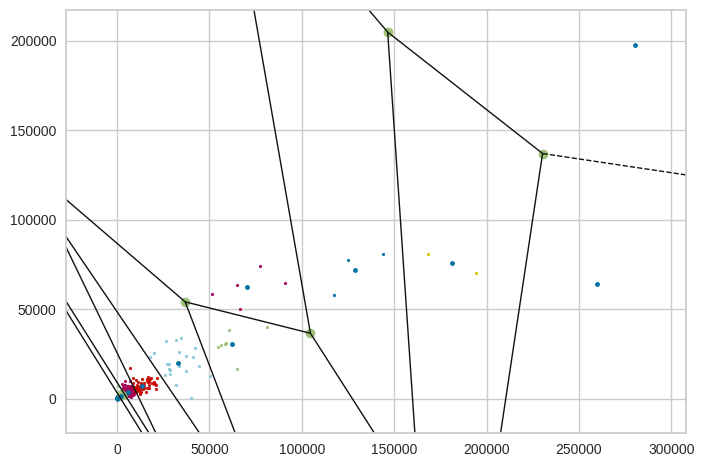

In [ ]:
fig = voronoi_plot_2d(vor,plt.gca())
for i in u_labels:
    plt.scatter(df2[labels == i].iloc[:,0] , df2[labels == i].iloc[:,1], label = i,s = 4)

Plotting the results(clusters) using a scatterplot for total bill vs frequency of buying

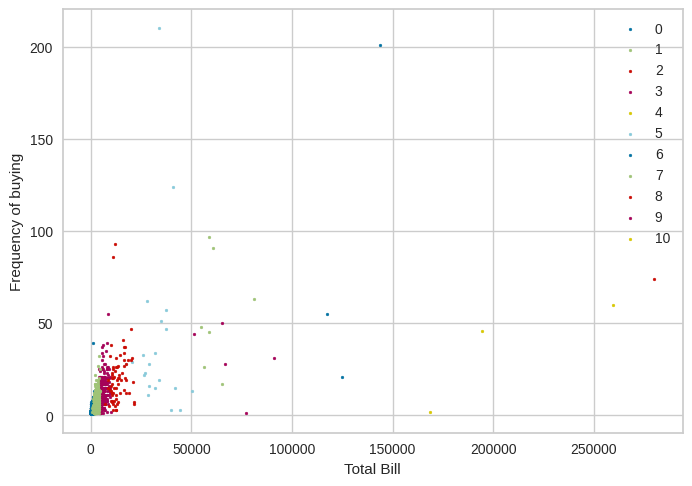

In [ ]:
for i in u_labels:
    plt.scatter(df2[labels == i].iloc[:,0] , df2[labels == i].iloc[:,2], label = i,s = 4)
plt.xlabel('Total Bill')
plt.ylabel('Frequency of buying')
plt.legend()
plt.show()

Finding shape of the centers

In [ ]:
centers.shape

(11, 4)

assigning new centres

In [ ]:
a1 = centers[:,0].reshape(-1,1)
a2 = centers[:,2].reshape(-1,1)
new_centers = np.hstack((a1,a2))
new_centers.shape

(11, 2)

Making Voronoi plots using the new centers

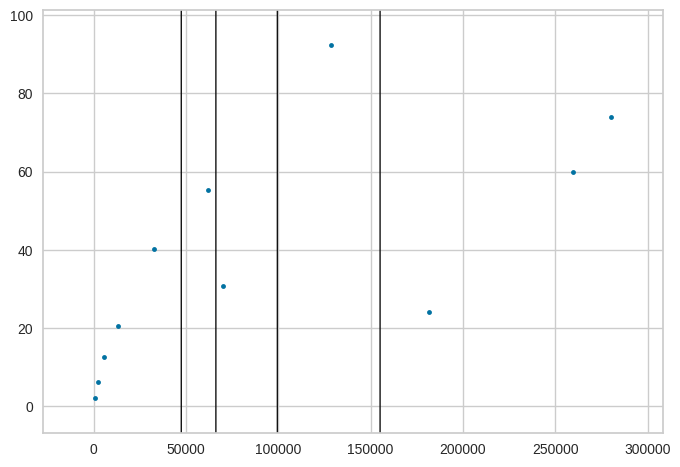

In [ ]:
vor = Voronoi(new_centers)
fig = voronoi_plot_2d(vor,plt.gca())

plt.show()

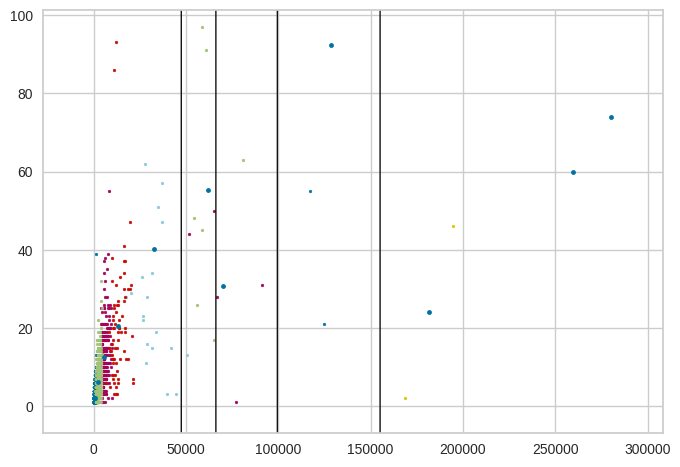

In [ ]:
fig = voronoi_plot_2d(vor,plt.gca())
for i in u_labels:
    plt.scatter(df2[labels == i].iloc[:,0] , df2[labels == i].iloc[:,2], label = i,s = 4)

Applying PCA to dataframe df2

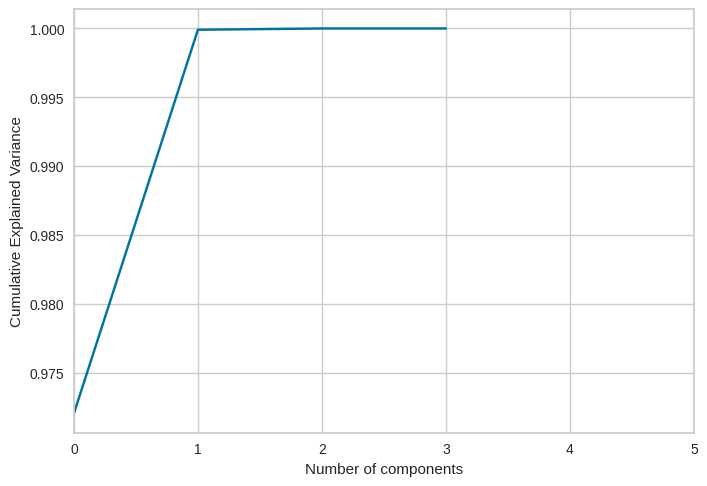

In [ ]:
pca = PCA(n_components = 4)
pca.fit(df2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.xlim(0,5)
plt.show()

Applying PCA with n_components=2 and applying kmeans and also using elbow method

                  0             1
0     100769.798877 -28673.758066
1       2586.618794    -45.622365
2        318.669954  -1133.880234
3       -526.947635    352.832701
4      -1986.099372     60.504929
...             ...           ...
4333   -2193.539701    121.382196
4334   -2277.006387     66.052721
4335   -2167.955432     68.834010
4336     133.256765   -161.685439
4337      -3.995004   -450.181905

[4338 rows x 2 columns]


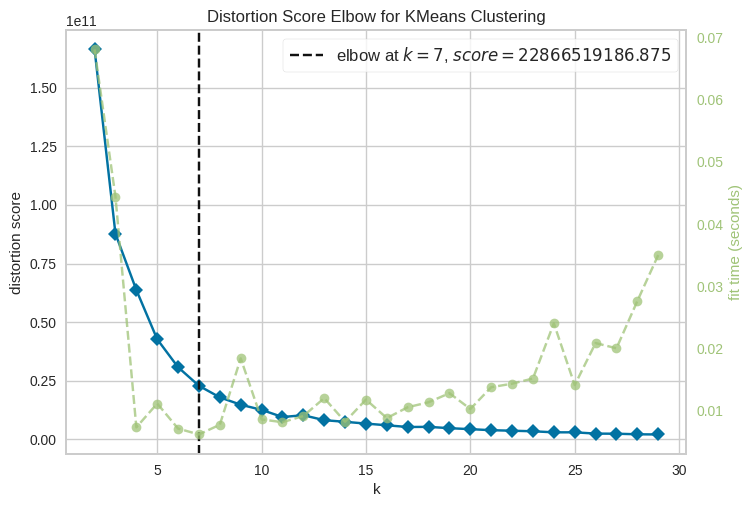

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
pca = PCA(n_components = 2)
d1 = pca.fit_transform(df2)
d1 = pd.DataFrame(d1)
print(d1)
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(d1)        # Fit the data to the visualizer
visualizer.show()

Plotting the clusters

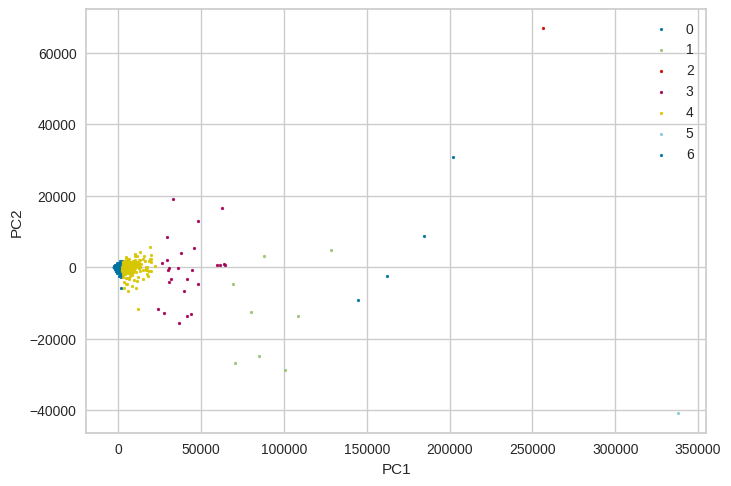

In [ ]:
model = KMeans(n_clusters=7, random_state=0,n_init='auto')
labels = model.fit_predict(d1)
u_labels = np.unique(labels)

#plotting the results:

for i in u_labels:
    plt.scatter(d1[labels == i].iloc[:,0] , d1[labels == i].iloc[:,1], label = i,s = 4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Making Voronoi plots

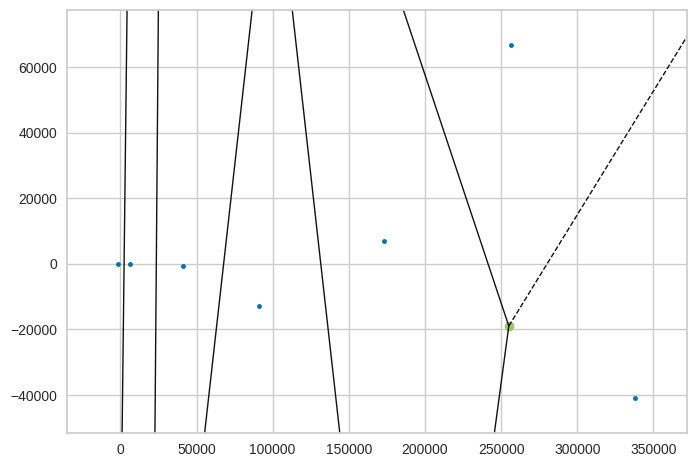

In [ ]:
centers=model.cluster_centers_
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())
plt.show()

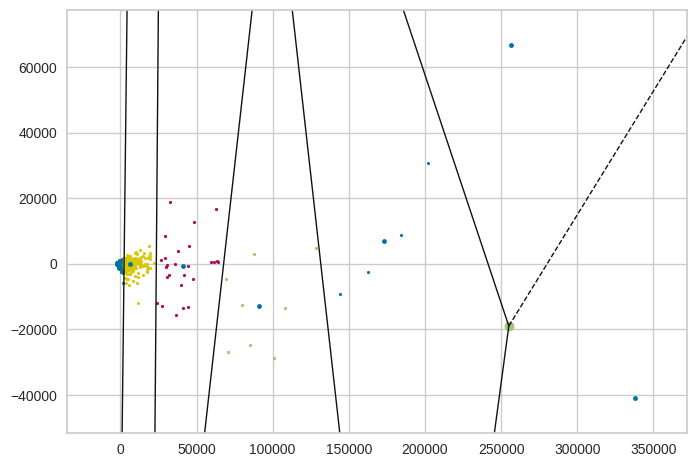

In [ ]:
fig = voronoi_plot_2d(vor,plt.gca())
for i in u_labels:
    plt.scatter(d1[labels == i].iloc[:,0] , d1[labels == i].iloc[:,1], label = i,s = 4)

Creating a RFM(recency, frequency, monetary) dataframe as rfm

In [ ]:
rfm = pd.DataFrame()
rfm['recency'] = y5['recency']
rfm['frequency'] = y5['frequency']
rfm['monetary'] = y5['total_spending']
rfm['customerid'] = y5['customerid']

Description of rfm

In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,98.041484,100.007757,6.0,23.000,56.00,147.50,379.00
frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02
customerid,4339.0,15299.936852,1721.889758,12346.0,13812.500,15299.00,16778.50,18287.00


Checking if monetary is 0 anywhere or not in rfm

In [ ]:
rfm = rfm[rfm['monetary'] > 0]

Calculating recency score, monetary score, frequency score

In [ ]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 3, labels=[ 3, 2, 1])

rfm['monetary_score'] = pd.qcut(rfm['monetary'], 3, labels=[1, 2, 3])

rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 3, labels=[1, 2, 3])

Calculating aggragate rfm score

In [ ]:
rfm['rfm_score'] = rfm['recency_score'].astype(str) + rfm['monetary_score'].astype(str) + rfm['frequency_score'].astype(str)
rfm.head()

,recency,frequency,monetary,customerid,recency_score,monetary_score,frequency_score,rfm_score
0,331,1,77183.60,12346.0,1,3,1,131
1,8,7,4310.00,12347.0,3,3,3,333
2,81,4,1797.24,12348.0,2,3,2,232
3,24,1,1757.55,12349.0,3,3,1,331
4,316,1,334.40,12350.0,1,1,1,111


Sorting values of rfm by rfm_score

In [ ]:
rfm.sort_values(by = 'rfm_score', ascending = False)

,recency,frequency,monetary,customerid,recency_score,monetary_score,frequency_score,rfm_score
3363,9,7,1295.39,16929.0,3,3,3,333
1197,24,8,2758.26,13971.0,3,3,3,333
1218,21,5,1393.69,13995.0,3,3,3,333
1217,9,6,2313.14,13994.0,3,3,3,333
1211,25,6,4147.96,13988.0,3,3,3,333
...,...,...,...,...,...,...,...,...
571,105,1,207.36,13099.0,1,1,1,111
1421,202,1,134.04,14280.0,1,1,1,111
3173,372,1,129.75,16679.0,1,1,1,111
1439,228,1,383.45,14304.0,1,1,1,111


Visualizing monetary, frequency, recency using histplots

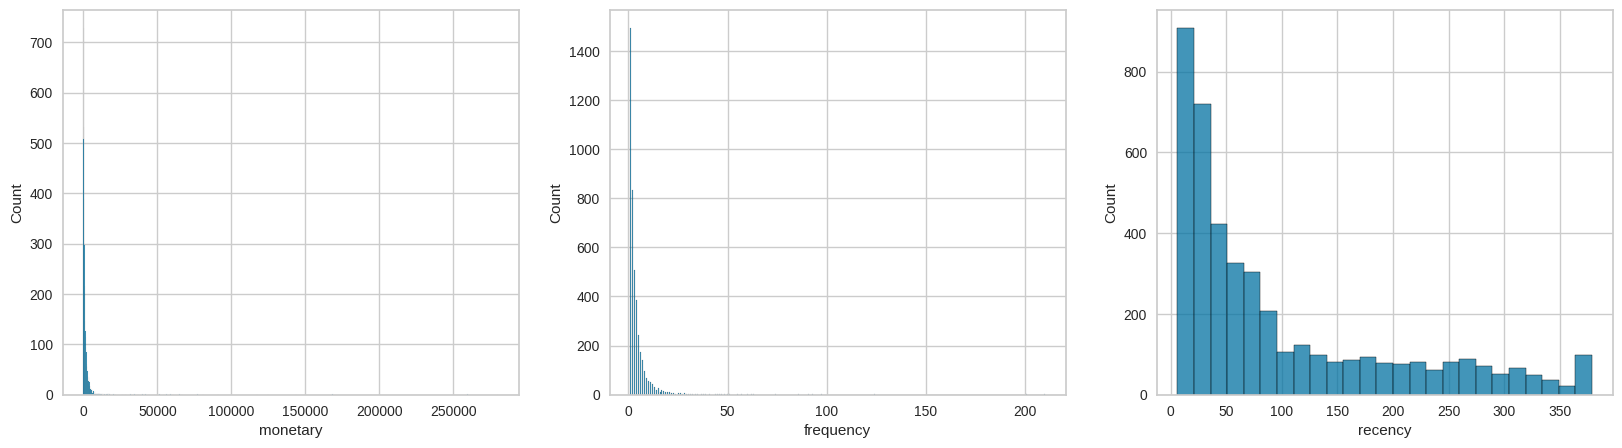

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm['monetary'])
plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'])
plt.subplot(1, 3, 3)
sns.histplot(rfm['recency'])
plt.show(block=True)

min max scaling the data

In [ ]:
rfm_k = pd.DataFrame()
rfm_k['recency'] = rfm['recency']
rfm_k['frequency'] = rfm['frequency']
rfm_k['monetary'] = rfm['monetary']
print(rfm_k)
mms = MinMaxScaler().fit_transform(rfm_k)
rfm_scaled = pd.DataFrame(mms)

      recency  frequency  monetary
0         331          1  77183.60
1           8          7   4310.00
2          81          4   1797.24
3          24          1   1757.55
4         316          1    334.40
...       ...        ...       ...
4334      283          1    180.60
4335      186          1     80.82
4336       13          2    178.05
4337        9         16   2094.88
4338       48          3   1837.28

[4338 rows x 3 columns]


Describing the RFM data

In [ ]:
rfm_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
0,4338.0,0.246808,0.268129,0.0,0.045576,0.134048,0.380027,1.0
1,4338.0,0.015659,0.036872,0.0,0.000000,0.004785,0.019139,1.0
2,4338.0,0.007318,0.032081,0.0,0.001084,0.002394,0.005917,1.0


Applying K-means clustering after doing dimentionality reduction with PCA

             0         1  customerid
0     0.620529  0.181038     12346.0
1    -0.241856  0.006035     12347.0
2    -0.045638 -0.003324     12348.0
3    -0.197806 -0.020316     12349.0
4     0.584499  0.006151     12350.0
...        ...       ...         ...
4333  0.496104  0.002450     18278.0
4334  0.236260 -0.007633     18280.0
4335 -0.227364 -0.021294     18281.0
4336 -0.240633  0.034468     18282.0
4337 -0.133868 -0.010290     18283.0

[4338 rows x 3 columns]


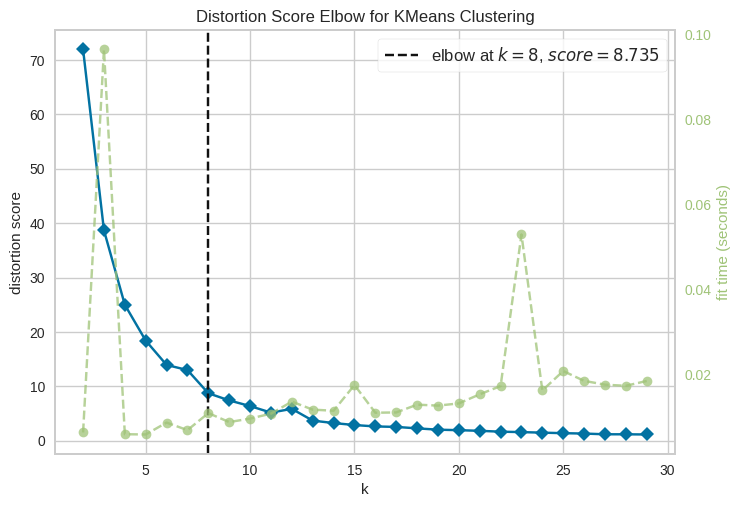

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
pca = PCA(n_components = 2)
d2 = pca.fit_transform(rfm_scaled)
d2 = pd.DataFrame(d2)
d2['customerid'] = rfm['customerid']
print(d2)
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(d2.iloc[:,:2])        # Fit the data to the visualizer
visualizer.show()

Plotting the data along with clusters for optimum number of clusters

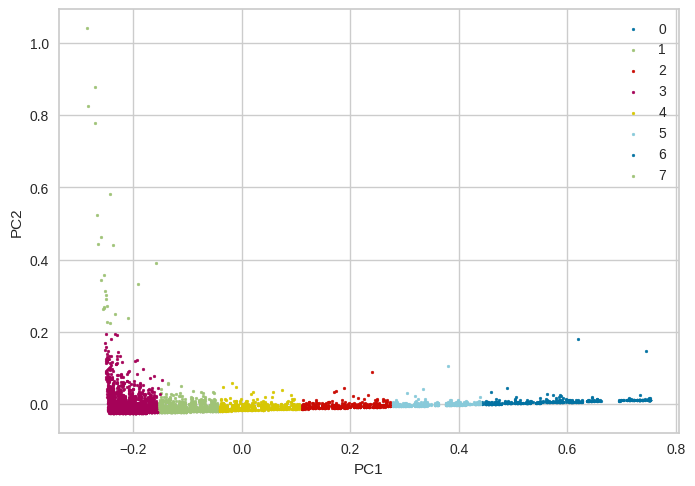

In [ ]:
model = KMeans(n_clusters=8, random_state=0,n_init='auto')
labels = model.fit_predict(d2.iloc[:,:2])
d2['k_means_labels'] = labels
u_labels = np.unique(labels)

#plotting the results:

for i in u_labels:
    plt.scatter(d2[labels == i].iloc[:,0] , d2[labels == i].iloc[:,1], label = i,s = 4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Plotting the Vorinoi plots seperately and with data

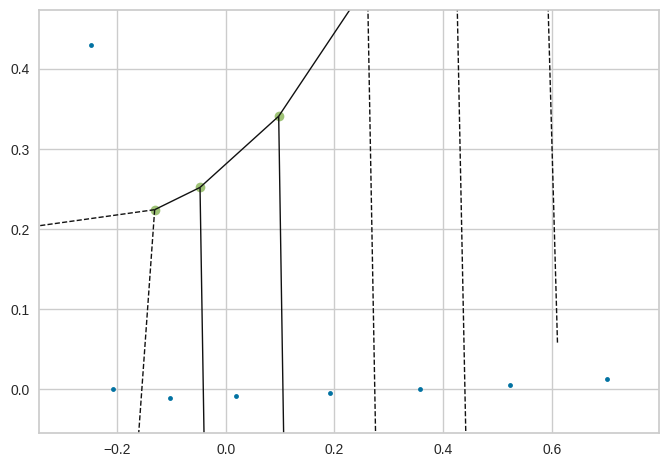

In [ ]:
centers=model.cluster_centers_
vor = Voronoi(centers)
fig = voronoi_plot_2d(vor,plt.gca())
plt.show()

(-0.1, 1.2)

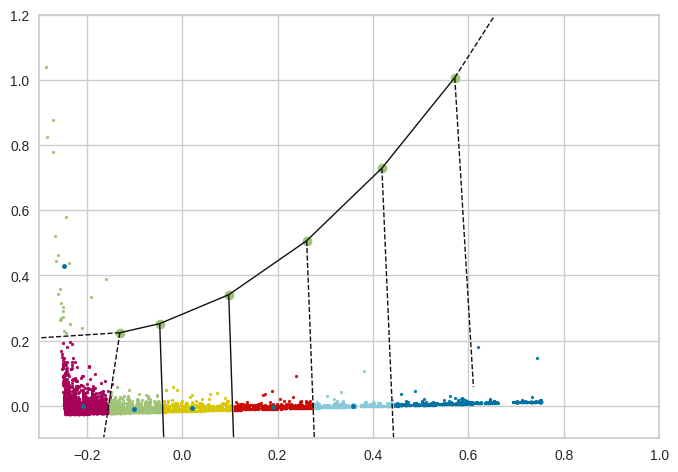

In [ ]:
fig = voronoi_plot_2d(vor,plt.gca())
for i in u_labels:
    plt.scatter(d2[labels == i].iloc[:,0] , d2[labels == i].iloc[:,1], label = i,s = 4)
plt.xlim([-0.3,1])
plt.ylim([-0.1,1.2])

In [ ]:
print(d2)

             0         1  customerid  k_means_labels
0     0.620529  0.181038     12346.0               6
1    -0.241856  0.006035     12347.0               3
2    -0.045638 -0.003324     12348.0               1
3    -0.197806 -0.020316     12349.0               3
4     0.584499  0.006151     12350.0               0
...        ...       ...         ...             ...
4333  0.496104  0.002450     18278.0               0
4334  0.236260 -0.007633     18280.0               2
4335 -0.227364 -0.021294     18281.0               3
4336 -0.240633  0.034468     18282.0               3
4337 -0.133868 -0.010290     18283.0               1

[4338 rows x 4 columns]


Output Cluster for k-means clustering with the help of the RFM matrix of the original retail data.

In [ ]:
output_k_means = pd.DataFrame()
output_k_means['customerid'] = d2['customerid']
output_k_means['labels'] = d2['k_means_labels']
print(output_k_means)

      customerid  labels
0        12346.0       6
1        12347.0       3
2        12348.0       1
3        12349.0       3
4        12350.0       0
...          ...     ...
4333     18278.0       0
4334     18280.0       2
4335     18281.0       3
4336     18282.0       3
4337     18283.0       1

[4338 rows x 2 columns]


Implementing Heirchail Clustering

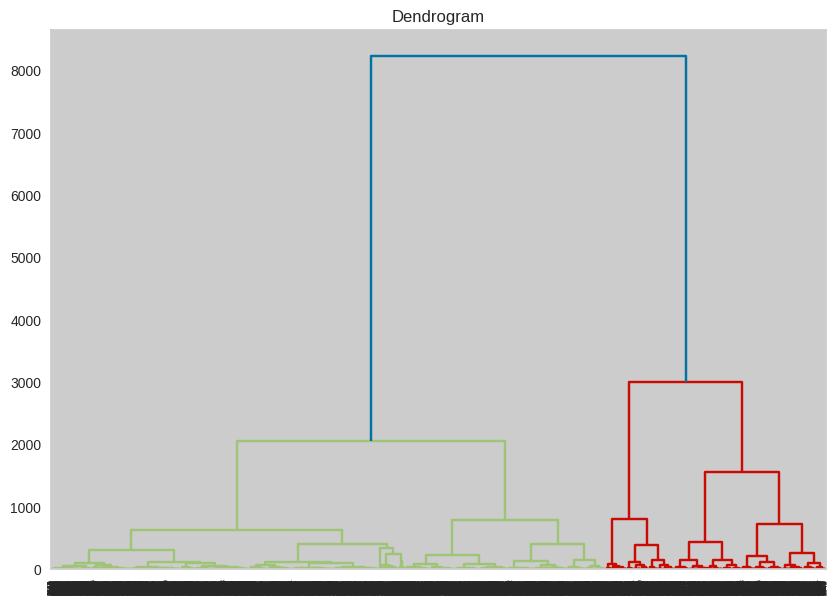

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = rfm_k.iloc[:,:2]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Calculating silhouette score for heirchial clustering

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

optimal_clusters = 3

hierarchical_labels = fcluster(clusters , optimal_clusters , criterion = 'maxclust')

hierarchical_silhoutte = silhouette_score(selected_data , hierarchical_labels)
print('Agglomerative Hierarchical Clustering Silhouette Score:' , hierarchical_silhoutte)

Agglomerative Hierarchical Clustering Silhouette Score: 0.6817373120728313
